In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import json
import ast

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
%matplotlib inline

plt.style.use('bmh')

# TextBlob

In [6]:
years = ['2021-12','2022-01']
df_list = []
for i in years:
    csv_files = glob.glob('spacy_textblob/'+i+ "/*.csv")
    for j in csv_files:
        df_list.append(pd.read_csv(j,index_col=False))
# df = pd.read_csv('../input/train.csv')
result = pd.concat(df_list)
print(result.shape[0])
result.head()

227633


,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2021-12-30 17:59:54+00:00,infectious disease like spread like fire witho...,-0.100000
1,1,2021-12-30 17:59:54+00:00,cdc recommend virgo man,0.000000
2,2,2021-12-30 17:59:54+00:00,rise patient admit hospital covid past day may...,-0.250000
3,3,2021-12-30 17:59:54+00:00,you all cry last year blue president pandemic ...,-0.233333
4,4,2021-12-30 17:59:54+00:00,august president absolutely patience two repub...,0.200000


<AxesSubplot:ylabel='Frequency'>

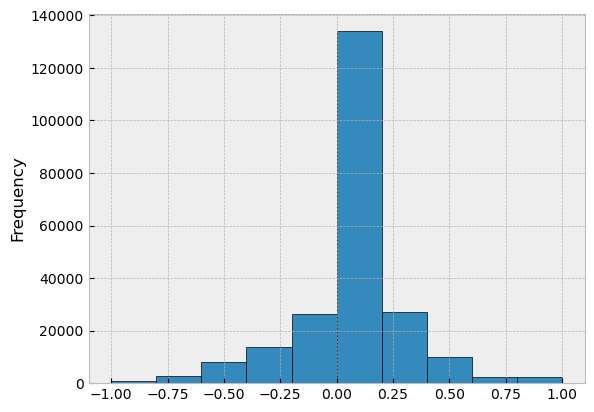

In [7]:
result['sentiment_score'].plot(kind='hist', edgecolor='black')

In [92]:
char_list = []
word_list = []
# count = 0
for tweet in result['full_text']:
#     count+=1
#     if count%1000==0:
#         print(len(str(tweet)))
    char_list.append(len(str(tweet)))
    word_list.append(len(str(tweet).split()))
result['chars'] = char_list
result['words'] = word_list

In [93]:
print(result['chars'].describe())

count    660977.000000
mean         80.402168
std          40.769529
min           1.000000
25%          56.000000
50%          75.000000
75%          95.000000
max         277.000000
Name: chars, dtype: float64


In [94]:
print(result['words'].describe())

count    660977.000000
mean         11.947342
std           5.787546
min           1.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          48.000000
Name: words, dtype: float64


In [105]:
pd_negative = result.loc[result['sentiment_score'] < 0]
pd_positive = result.loc[result['sentiment_score'] > 0]
pd_neutral = result.loc[result['sentiment_score'] == 0]
print(pd_positive.shape[0])
print(pd_negative.shape[0])
print(pd_neutral.shape[0])

263146
146007
251824


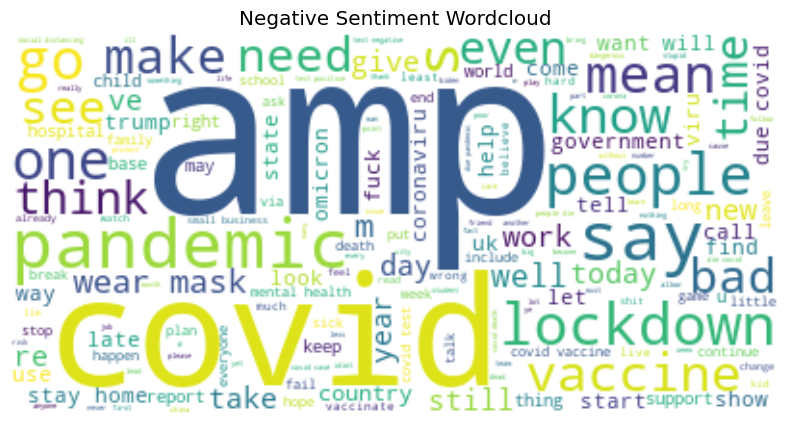

In [106]:
text = " ".join(str(i) for i in pd_negative.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Wordcloud")
plt.show()

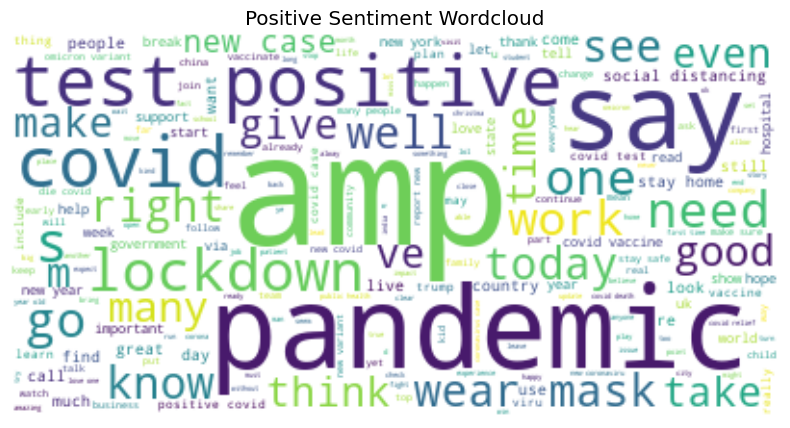

In [107]:
text = " ".join(str(i) for i in pd_positive.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Wordcloud")
plt.show()

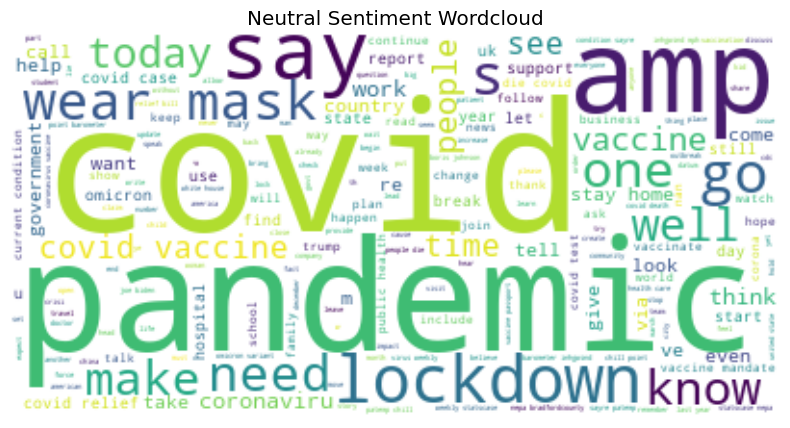

In [108]:
text = " ".join(str(i) for i in pd_neutral.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Sentiment Wordcloud")
plt.show()

# Vader

In [8]:
years = ['2020-11','2020-12','2021-01','2021-02','2021-12','2022-01']
df_list = []
for i in years:
    csv_files = glob.glob('raw_vader/'+i+ "/*.csv")
    for j in csv_files:
        df_list.append(pd.read_csv(j,index_col=False))
result = pd.concat(df_list)
print(result.shape[0])
result.head()

660706


,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-11-14 15:59:54+00:00,girl?? you don't live here and you obviously d...,"{'neg': 0.047, 'neu': 0.814, 'pos': 0.139, 'co..."
1,1,2020-11-14 15:59:54+00:00,"RT Don't fall for it! STAY HOME, STAY SAFE! L...","{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp..."
2,2,2020-11-14 15:59:54+00:00,RT Promised that I will tweet you everyday my ...,"{'neg': 0.316, 'neu': 0.596, 'pos': 0.088, 'co..."
3,3,2020-11-14 15:59:54+00:00,The scientists from Pfizer produced the vaccin...,"{'neg': 0.203, 'neu': 0.75, 'pos': 0.048, 'com..."
4,4,2020-11-14 15:59:54+00:00,RT Disney is Designing the World's Best Cruise...,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp..."


In [9]:
# result = pd.concat([result,result["sentiment_score"].apply(pd.Series)], axis = 1)
# result.head()
# result['sentiment_score']['compound'].plot(kind='hist', edgecolor='black')
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660706 entries, 0 to 149
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       660706 non-null  int64 
 1   created_at       660706 non-null  object
 2   full_text        660699 non-null  object
 3   sentiment_score  660706 non-null  object
dtypes: int64(1), object(3)
memory usage: 25.2+ MB


In [10]:
compound_list = []
for sentiment in result['sentiment_score']:
#     print(sentiment)
    sentiment = sentiment.replace("\'", "\"")
    compound_list.append(json.loads(sentiment)['compound'])
result['compound'] = compound_list
result.head()
    

,Unnamed: 0,created_at,full_text,sentiment_score,compound
0,0,2020-11-14 15:59:54+00:00,girl?? you don't live here and you obviously d...,"{'neg': 0.047, 'neu': 0.814, 'pos': 0.139, 'co...",0.6591
1,1,2020-11-14 15:59:54+00:00,"RT Don't fall for it! STAY HOME, STAY SAFE! L...","{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp...",0.8816
2,2,2020-11-14 15:59:54+00:00,RT Promised that I will tweet you everyday my ...,"{'neg': 0.316, 'neu': 0.596, 'pos': 0.088, 'co...",-0.7587
3,3,2020-11-14 15:59:54+00:00,The scientists from Pfizer produced the vaccin...,"{'neg': 0.203, 'neu': 0.75, 'pos': 0.048, 'com...",-0.8140
4,4,2020-11-14 15:59:54+00:00,RT Disney is Designing the World's Best Cruise...,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.6369


<AxesSubplot:ylabel='Frequency'>

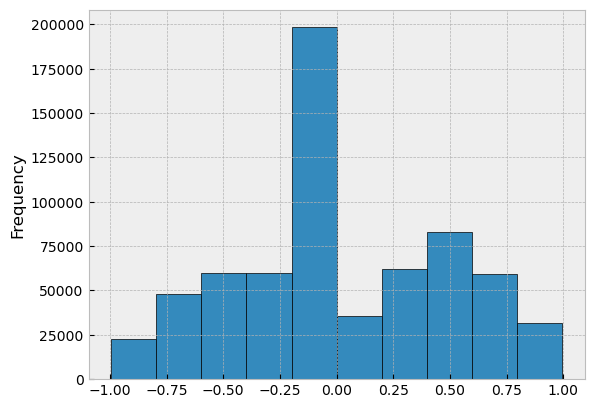

In [11]:
result['compound'].plot(kind='hist', edgecolor='black')

In [13]:
pd_negative = result.loc[result['compound'] < 0]
pd_positive = result.loc[result['compound'] > 0]
pd_neutral = result.loc[result['compound'] == 0]
print(pd_positive.shape[0])
print(pd_negative.shape[0])
print(pd_neutral.shape[0])

271747
222691
166268


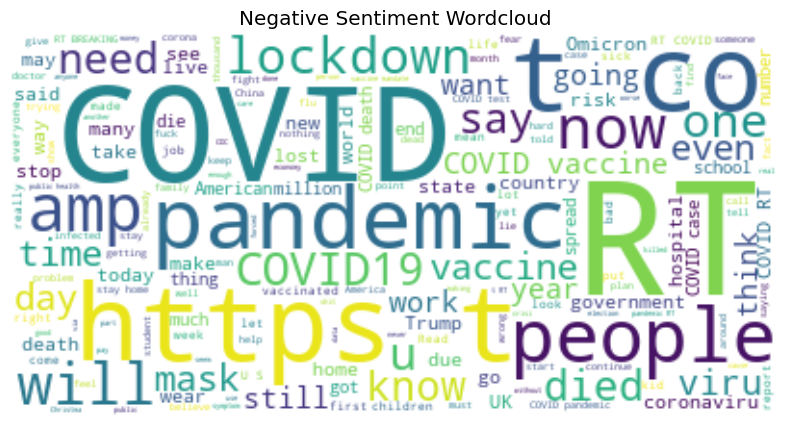

In [17]:
text = " ".join(str(i) for i in pd_negative.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Wordcloud")
plt.show()
wordcloud.to_file('neg_vader_all.png')

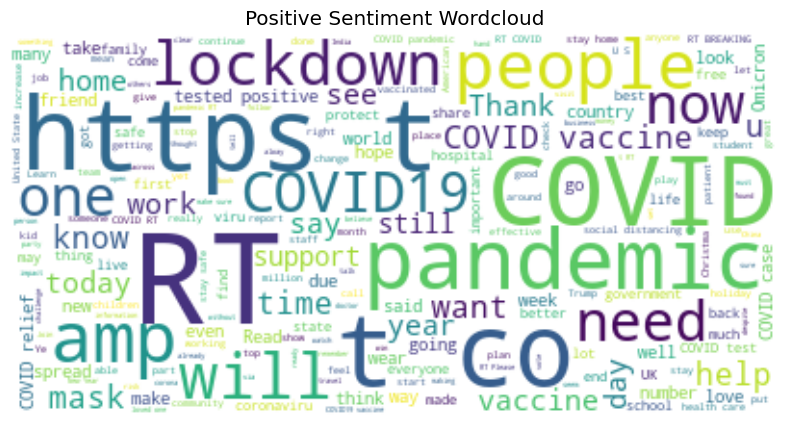

In [18]:
text = " ".join(str(i) for i in pd_positive.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Wordcloud")
plt.show()
wordcloud.to_file('pos_vader_all.png')

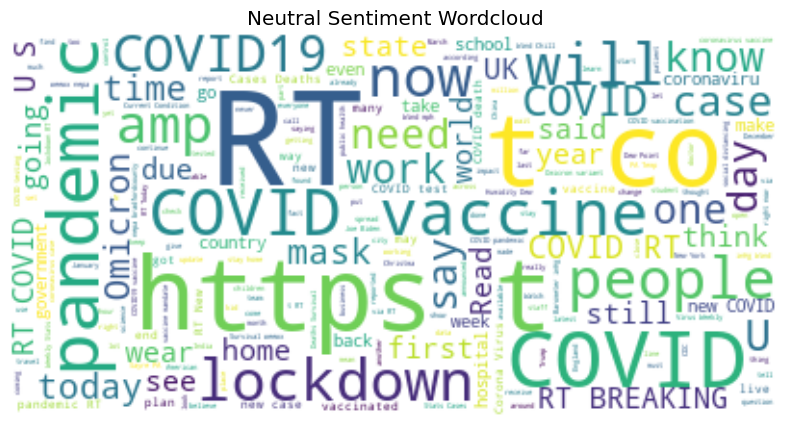

In [19]:
text = " ".join(str(i) for i in pd_neutral.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Sentiment Wordcloud")
plt.show()
wordcloud.to_file('neu_vader_all.png')

# Roberta

In [74]:
years = ['2020-11','2020-12','2021-01','2021-02','2021-12','2022-01']
df_list = []
for i in years:
    csv_files = glob.glob('raw_roBERTa/'+i+ "/*.csv")
    for j in csv_files:
        df_list.append(pd.read_csv(j,index_col=False))
result = pd.concat(df_list)
print(result.shape[0])
result.head()

660706


,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-11-14 15:59:54+00:00,girl?? you don't live here and you obviously d...,"[{'label': 'Negative', 'score': 0.894157588481..."
1,1,2020-11-14 15:59:54+00:00,"RT Don't fall for it! STAY HOME, STAY SAFE! L...","[{'label': 'Neutral', 'score': 0.4373839497566..."
2,2,2020-11-14 15:59:54+00:00,RT Promised that I will tweet you everyday my ...,"[{'label': 'Negative', 'score': 0.923809826374..."
3,3,2020-11-14 15:59:54+00:00,The scientists from Pfizer produced the vaccin...,"[{'label': 'Negative', 'score': 0.914864242076..."
4,4,2020-11-14 15:59:54+00:00,RT Disney is Designing the World's Best Cruise...,"[{'label': 'Neutral', 'score': 0.5996864438056..."


In [75]:
score_list = []
label_list = []
for sentiment in result['sentiment_score']:
#     print(sentiment)
    sentiment = sentiment.replace("\'", "\"")
    sent_dict = ast.literal_eval(sentiment)
#     print(sent_dict)
    label_list.append(sent_dict[0]['label'])
    score_list.append(sent_dict[0]['score'])
#     compound_list.append(json.loads(sentiment)['compound'])
result['label'] = label_list
result['score'] = score_list
result.head()

,Unnamed: 0,created_at,full_text,sentiment_score,label,score
0,0,2020-11-14 15:59:54+00:00,girl?? you don't live here and you obviously d...,"[{'label': 'Negative', 'score': 0.894157588481...",Negative,0.894158
1,1,2020-11-14 15:59:54+00:00,"RT Don't fall for it! STAY HOME, STAY SAFE! L...","[{'label': 'Neutral', 'score': 0.4373839497566...",Neutral,0.437384
2,2,2020-11-14 15:59:54+00:00,RT Promised that I will tweet you everyday my ...,"[{'label': 'Negative', 'score': 0.923809826374...",Negative,0.923810
3,3,2020-11-14 15:59:54+00:00,The scientists from Pfizer produced the vaccin...,"[{'label': 'Negative', 'score': 0.914864242076...",Negative,0.914864
4,4,2020-11-14 15:59:54+00:00,RT Disney is Designing the World's Best Cruise...,"[{'label': 'Neutral', 'score': 0.5996864438056...",Neutral,0.599686


In [76]:
pd_negative = result.loc[result['label'] == "Negative"]
pd_neutral = result.loc[result['label'] == "Neutral"]
pd_positive = result.loc[result['label'] == "Positive"]

<AxesSubplot:ylabel='Frequency'>

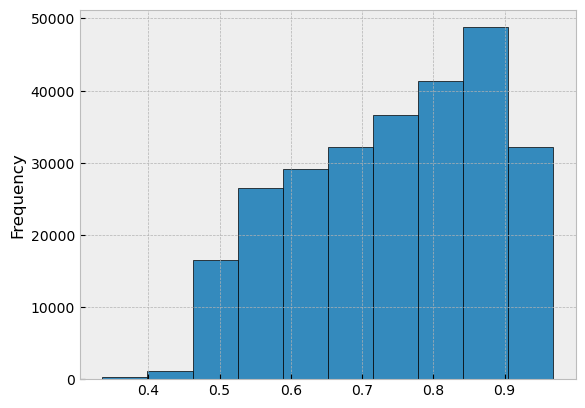

In [77]:
pd_negative['score'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

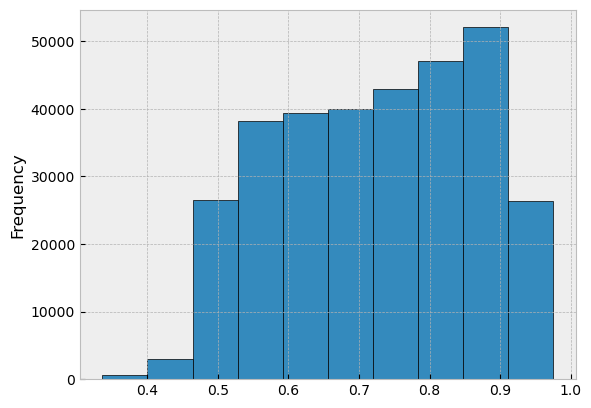

In [78]:
pd_neutral['score'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

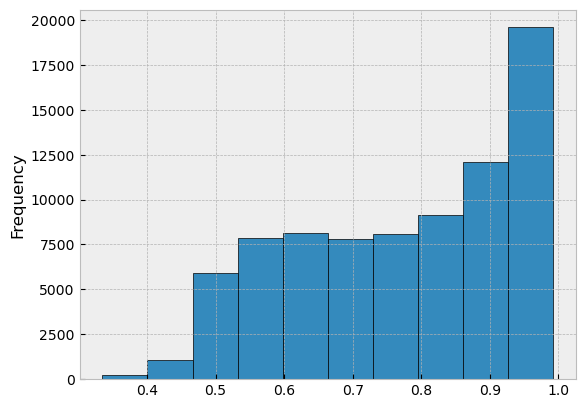

In [79]:
pd_positive['score'].plot(kind='hist', edgecolor='black')

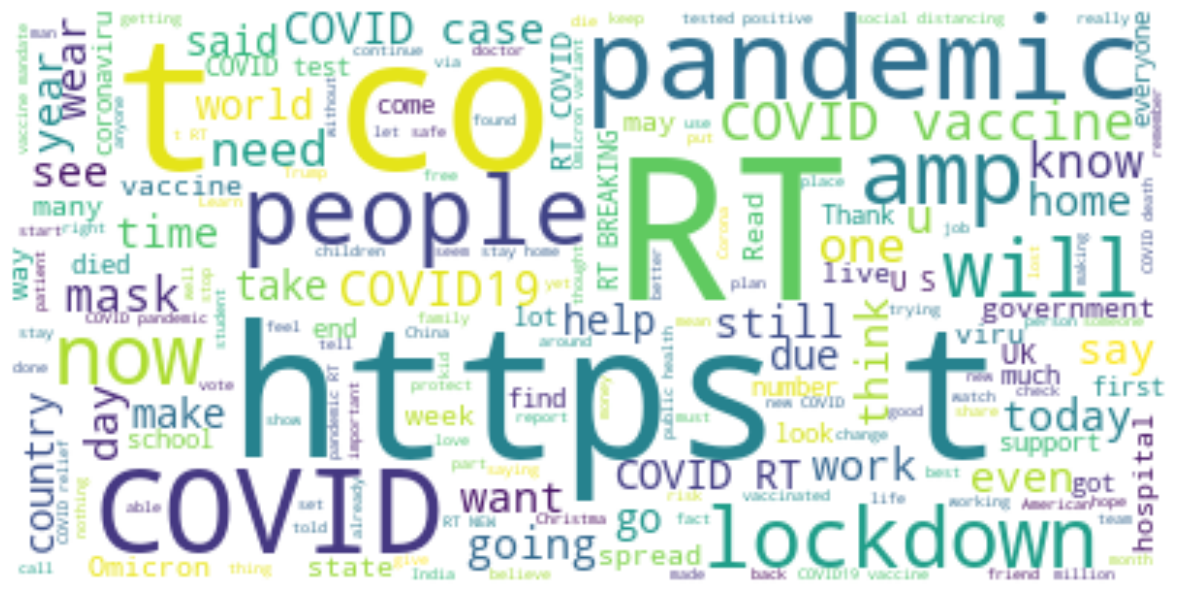

In [84]:
text = " ".join(str(i) for i in result.full_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

In [86]:
wordcloud.to_file('cloud.png')

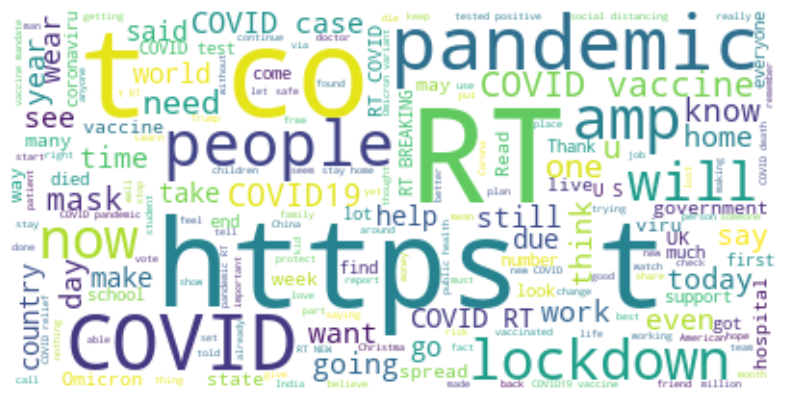

In [87]:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()